In [2]:
import networkx as nx
import pandas as pd

G_temporal = nx.DiGraph()
df = pd.read_csv("temp.csv")
for _, row in df.iterrows():
    G_temporal.add_edge(row['source'], row['target'], timestamp=row['date'])

    

In [16]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from cdlib import algorithms, viz

G_temporal = nx.Graph()

df['timestamp'] = pd.to_datetime(df['date']).astype('int64')
for _, row in df.iterrows():
    try:
        source, target, timestamp = int(row['source']), int(row['target']), int(row['timestamp'])
        G_temporal.add_edge(source, target, timestamp=timestamp)
    except ValueError as e:
        print(f"Error adding edge: {e}")
        continue



In [24]:
import networkx as nx
import community  

G_temporal_positive_weights = G_temporal.copy()
for edge in G_temporal.edges():
    G_temporal_positive_weights[edge[0]][edge[1]]['timestamp'] = abs(G_temporal[edge[0]][edge[1]]['timestamp'])

G_temporal_undirected = G_temporal_positive_weights.to_undirected()

partition = community.best_partition(G_temporal_undirected, weight='timestamp', resolution=1.0, randomize=True)

communities_temporal = {v: [] for v in set(partition.values())}
for node, comm_id in partition.items():
    communities_temporal[comm_id].append(node)

print(communities_temporal)


{0: [9907233, 9301253, 9504304, 9505235, 9506257, 9606402, 9607354, 9611297, 9702314, 9704296, 9803214, 9903217, 9311274, 9502335, 9611296, 9612258, 9301203, 9301206, 9503474, 9302247, 9501357, 9501384, 9502366, 9504372, 9511210, 9610453, 9706487, 9211239, 9302217, 9405341, 9508393, 9606210, 9610360, 9605245, 9610282, 9803242, 9804209, 9805334, 9402363, 9502363, 8234, 9512356, 9706260, 9802300, 9811472, 9902334, 9906434, 9907335, 9304219, 103230, 9206236, 9302246, 9306323, 9307263, 9310355, 9403233, 9409255, 9412243, 9502254, 9304230, 9806472, 9903287, 9408256, 9209204, 9301295, 9303311, 9309211, 9309268, 9209257, 9206261, 9210265, 9301276, 9304275, 7319, 102017, 105011, 109113, 111262, 9909202, 9912264, 9907341, 9909473, 4247, 5189, 10008, 9910237, 9911233, 9911309, 9911392, 1088, 2234, 2235, 6172, 7208, 12371, 102287, 108240, 9511465, 9705244, 9801326, 9809594, 9812471, 9911202, 9912254, 9912513, 6146, 7196, 7338, 10111, 10162, 10209, 12019, 12221, 101098, 9802447, 9805442, 9909292, 

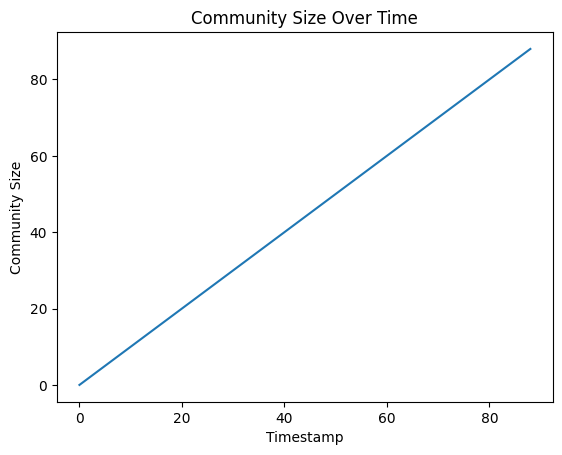

AttributeError: module 'cdlib.algorithms' has no attribute 'modularity'

In [29]:
community_sizes = [community for community in communities_temporal]
plt.plot(community_sizes)
plt.title('Community Size Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Community Size')
plt.show()


modularities = [algorithms.modularity(G_temporal, community) for community in communities_temporal]
plt.plot(modularities)
plt.title('Modularity Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Modularity')
plt.show()



In [ ]:

overlap_matrix = algorithms.overlap_matrix(communities_temporal, G_temporal)
plt.imshow(overlap_matrix, cmap='Blues', interpolation='none', aspect='auto')
plt.title('Community Overlap Matrix')
plt.xlabel('Community ID')
plt.ylabel('Timestamp')
plt.colorbar(label='Overlap')
plt.show()


In [ ]:
stabilities = [algorithms.stability(communities_temporal[i], communities_temporal[i + 1]) for i in range(len(communities_temporal) - 1)]
plt.plot(stabilities)
plt.title('Community Stability Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Stability')

plt.show()


In [ ]:

viz.plot_community_graph(G_temporal, communities_temporal, plot_overlaps=False)
plt.show()